In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [57]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2 * np.pi * n *1j * k / N)
    return M @ x

In [65]:
x = np.random.random(2048)
print(dft(x))
print("\n")
print(np.fft.fft(x))

[1031.18034818 +0.j          -10.22470798 -6.31675621j
   11.9765556  -1.13157389j ...  -12.24347457-13.23837023j
   11.9765556  +1.13157389j  -10.22470798 +6.31675621j]


[1031.18034818 +0.j          -10.22470798 -6.31675621j
   11.9765556  -1.13157389j ...  -12.24347457-13.23837023j
   11.9765556  +1.13157389j  -10.22470798 +6.31675621j]


In [59]:
def idft(x):
    n = len(x)
    fn = dft(x)
    return fn.conj()/n

In [66]:
print(idft(x))
print("\n")
print(np.fft.ifft(x))

[ 0.50350603-0.j         -0.00499253+0.00308435j  0.00584793+0.00055253j
 ... -0.00597826+0.00646405j  0.00584793-0.00055253j
 -0.00499253-0.00308435j]


[ 0.50350603+0.j         -0.00499253+0.00308435j  0.00584793+0.00055253j
 ... -0.00597826+0.00646405j  0.00584793-0.00055253j
 -0.00499253-0.00308435j]


In [67]:
def fft(x):
    n = len(x)
    if n == 1:
        return x
    even = fft(x[::2])
    odd = fft(x[1::2])
    X = np.zeros(n, dtype=np.complex128)
    for k in range(n//2):
        p = even[k]
        q = np.exp(-2j*np.pi*k/n)*odd[k]
        X[k] = p + q
        X[k + n//2] = p - q
    return X

In [62]:
size = [2048]
result = []
x = np.random.random(size)
start = time.time()
X = fft(x)
end = time.time()
result.append(end - start)
print(X)
start = time.time()
X_b = np.fft.fft(x)
end = time.time()
result.append(end - start)
print(X_b)
start = time.time()
X_dft = dft(x)
end = time.time()
result.append(end - start)
print("\n \n")
print("FFT vs FFT_LIB VS DFT")
print(result)

[1015.59787972+0.j            1.62387857+1.74440132j
   -1.05591039-0.47759264j ...    3.68836294-1.13535439j
   -1.05591039+0.47759264j    1.62387857-1.74440132j]
[1015.59787972+0.j            1.62387857+1.74440132j
   -1.05591039-0.47759264j ...    3.68836294-1.13535439j
   -1.05591039+0.47759264j    1.62387857-1.74440132j]

 

FFT vs FFT_LIB VS DFT
[0.05962085723876953, 0.001107931137084961, 0.34886717796325684]


In [63]:
size = [512]
result = []
x = np.random.random(size)

start = time.time()
X = fft(x)
end = time.time()
result.append(end - start)

start = time.time()
X_b = np.fft.fft(x)
end = time.time()
result.append(end - start)

start = time.time()
X_dft = dft(x)
end = time.time()
result.append(end - start)

print("FFT vs FFT_LIB VS DFT")
print(result)

FFT vs FFT_LIB VS DFT
[0.010313987731933594, 8.606910705566406e-05, 0.01957082748413086]


In [64]:
size = [128]
result = []
x = np.random.random(size)

start = time.time()
X = fft(x)
end = time.time()
result.append(end - start)

start = time.time()
X_b = np.fft.fft(x)
end = time.time()
result.append(end - start)

start = time.time()
X_dft = dft(x)
end = time.time()
result.append(end - start)

print("FFT vs FFT_LIB VS DFT")
print(result)

FFT vs FFT_LIB VS DFT
[0.0026369094848632812, 6.413459777832031e-05, 0.10893893241882324]


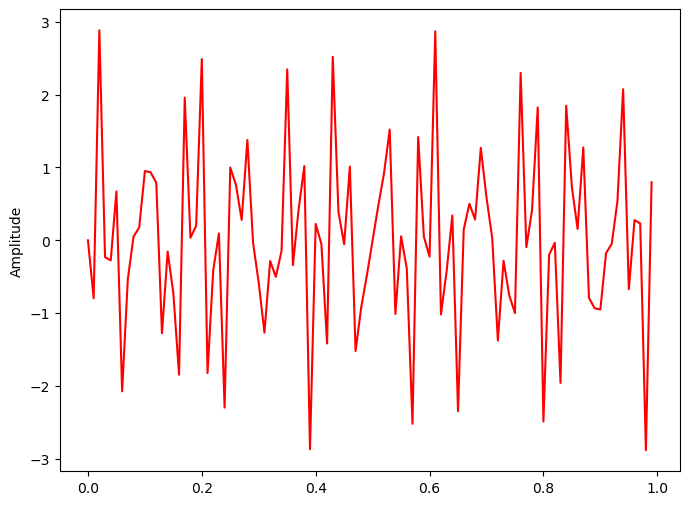

In [87]:
sr = 100
ts = 1.0/sr
t = np.arange(0,1,ts)
x=0
freq = [np.random.randint(x,x*3) for x in range(10,51,10)]
for f in freq:
    x += np.sin(2*np.pi*f*t)
x_a = x.copy()
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()


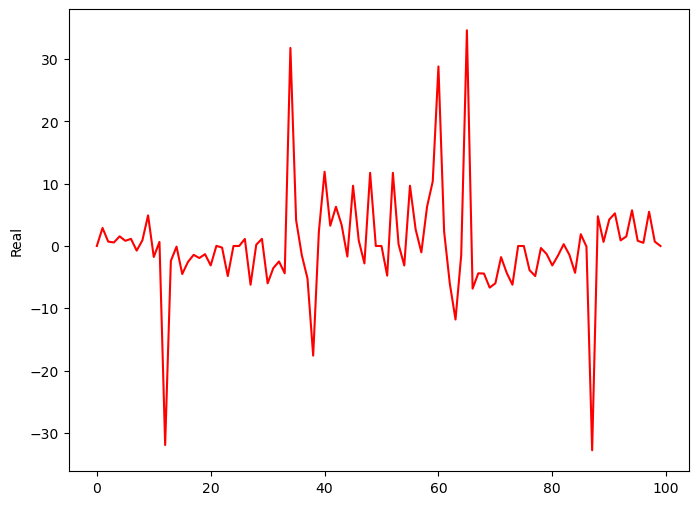

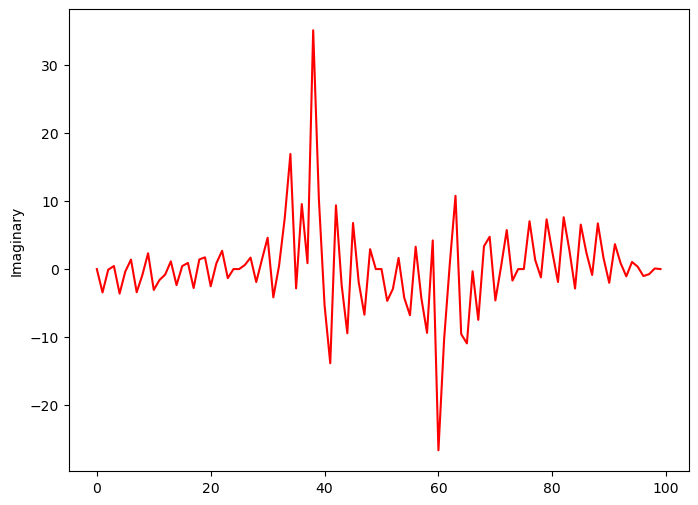

In [88]:
X = fft(x_a)

plt.figure(figsize = (8, 6))
plt.plot(np.real(X), 'r')
plt.ylabel('Real')

plt.figure(figsize = (8, 6))
plt.plot(np.imag(X), 'r')
plt.ylabel('Imaginary')
plt.show()

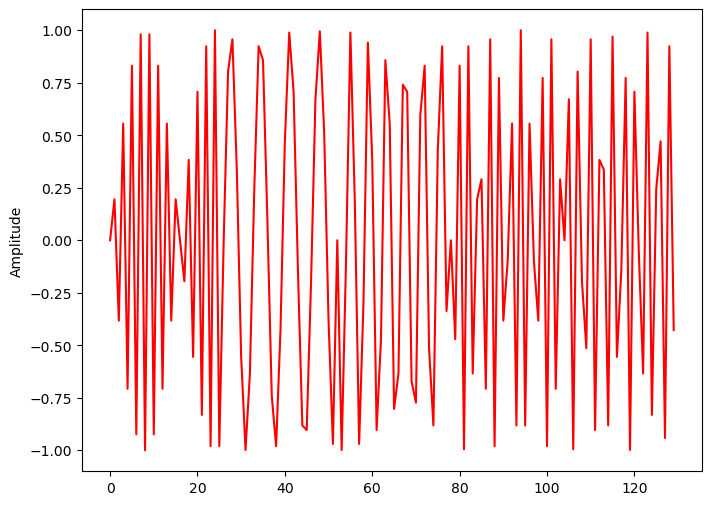

In [89]:
sr = 128
ts = 5.0/sr
t =[]
x=[]
for i in range(5):
    t.append(np.arange(0,1,ts))
for j in range(5):
    x.append(np.sin(2*np.pi*freq[j]*t[j]))
x_b = np.concatenate([x[0], x[1], x[2], x[3], x[4]])
plt.figure(figsize = (8, 6))
plt.plot(x_b, 'r')
plt.ylabel('Amplitude')
plt.show()